# Exploratory Data Analysis

## Imports and Setup Options

In [20]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import os

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Francisco Pontes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.0)
  from scipy.stats import gaussian_kde


## Loading Data

In [10]:
data_path = os.path.join('..', 'data', '01_raw', 'diabetes_012_health_indicators_BRFSS2015.csv')




In [11]:
raw_data = pd.read_csv(data_path)
display(raw_data.head())

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## EDA

### Metadata [Extracted from source] <br>
Source: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
- Diabetes_012: 0 = no diabetes 1 = prediabetes 2 = diabetes <br>
- HighBP: 0 = no high BP 1 = high BP <br>
- HighChol: 0 = no high cholesterol 1 = high cholesterol <br>
- CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years <br>
- BMI: Body Mass Index <br>
- Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes <br>
- Stroke: (Ever told) you had a stroke. 0 = no 1 = yes <br>
- HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes <br>
- PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes <br>
- Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes <br>
- Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes <br>
- HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per <br>
- AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes <br>
- NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes <br>
- GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor <br>
- MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days <br>
- PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days <br>
- DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes <br>
- Sex: 0 = female 1 = male <br>
- Age: 13-level age category 1 = 18-24 9 = 60-64 13 = 80 or older <br>
- Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate) <br>
- Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more <br>

In [12]:
raw_data.shape

(253680, 22)

Our dataset has 22 columns. Our target is __Diabetes_012__, a categorical variable that indicates whether the diagnosed person has no diabetes [0], has pre-diabetes [1], or already developed diabetes [2]

In [14]:
raw_data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

There are no missing values, and our dataset does not contain any columns represented by strings. So, we expect our preprocessing to be minimal.

In [31]:
target = ['Diabetes_012']

numerical_features = ['BMI', 'GenHlth','MentHlth', 'PhysHlth','Age', 'Education','Income']

binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
                   'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                     'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                     'DiffWalk', 'Sex']

## Target 

In [32]:
raw_data[target].value_counts()

Diabetes_012
0.0             213703
2.0              35346
1.0               4631
Name: count, dtype: int64

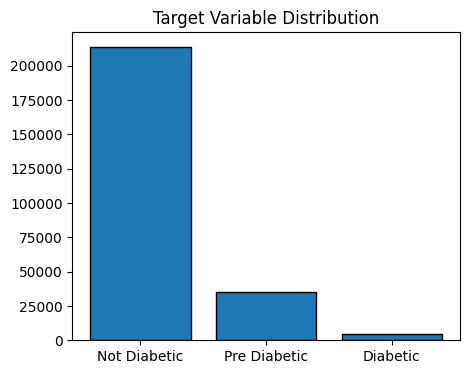

In [33]:
plt.figure(figsize=(5, 4))
plt.bar(["Not Diabetic", "Pre Diabetic", "Diabetic"], raw_data[target].value_counts().values, edgecolor='black')
plt.title('Target Variable Distribution')
plt.show()

Our target varible is not balanced. We must take this into account when analyzing the results (i.e: Macro F-1 Score instead of Weighted)

## Numerical Data

In [34]:
raw_data[numerical_features].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


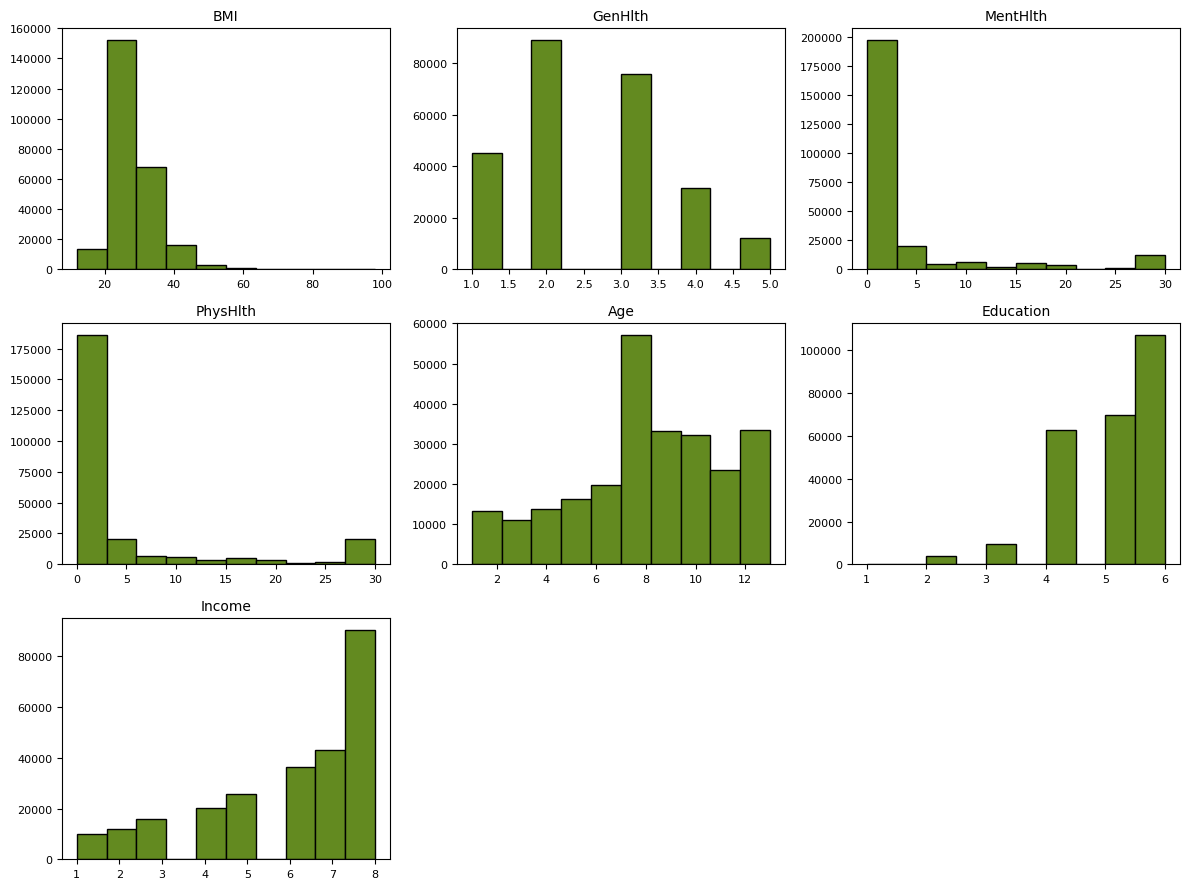

In [44]:
ncols = 3
nrows = -(-len(numerical_features) // ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    axes[i].hist(raw_data[col].dropna(), color='#638a20', edgecolor='black')
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(len(numerical_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Main takeaways: <br>
- BMI, MentHlth, PhysHlth are skewed and might benefit from transformation (e.g., log) in modeling. <br>
- Ordinal variables like Age, Education, Income show good variability. <br>
- The dataset may represent a relatively well-educated and high-income sample.

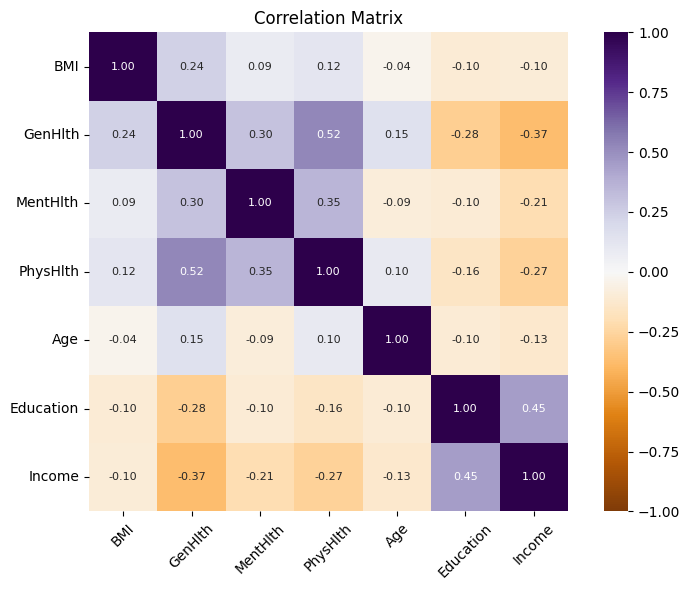

In [45]:
corr = raw_data[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='PuOr', vmin=-1, vmax=1, square=True,
            xticklabels=corr.columns, yticklabels=corr.columns, annot_kws={"size": 8})
plt.title('Correlation Matrix', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Main takeaways: <br>
- Socioeconomic factors (Income, Education) are modestly protective against poor health (both general and physical).
- Subjective health measures are more tightly interrelated than objective factors like age or BMI.
- Age appears to be independent of most other variables in this context.

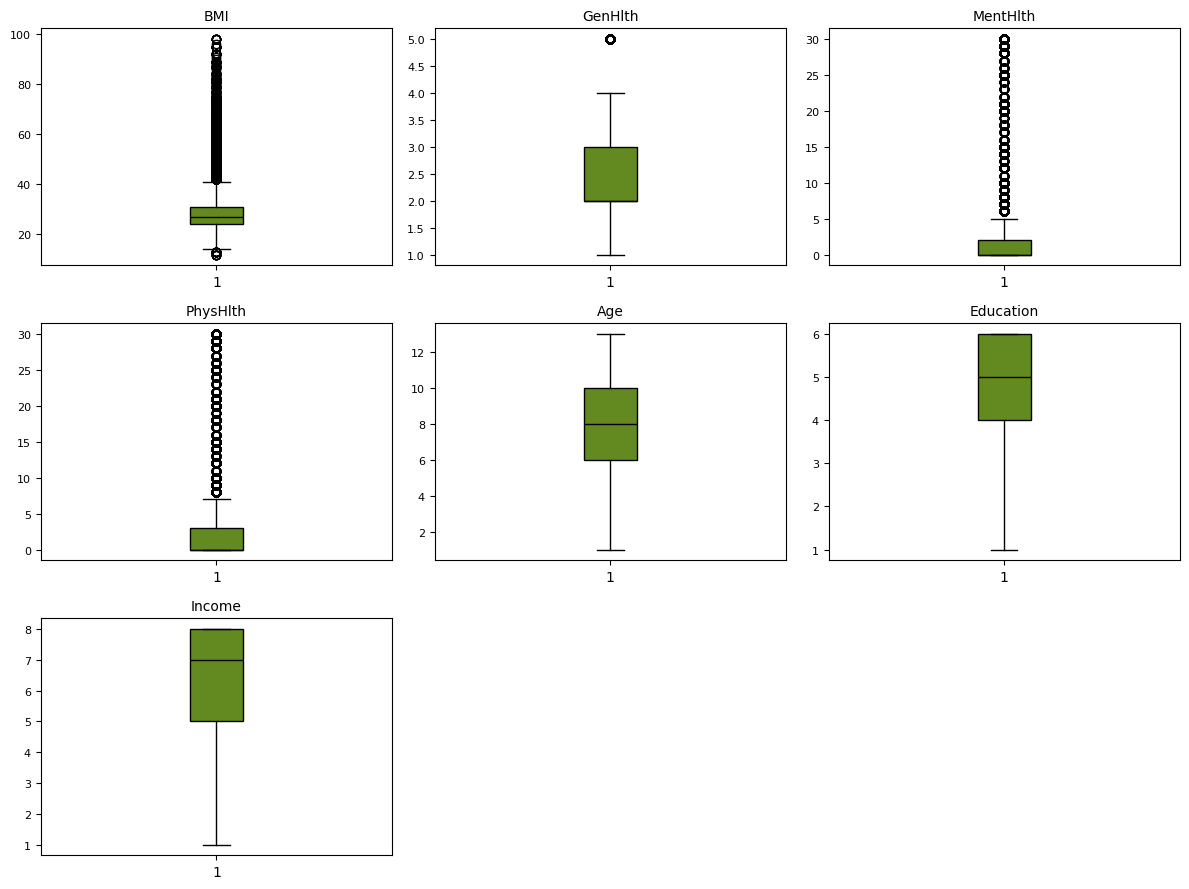

In [43]:
ncols = 3
nrows = -(-len(numerical_features) // ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    axes[i].boxplot(raw_data[col].dropna(), patch_artist=True,
                    boxprops=dict(facecolor="#638a20", edgecolor='black'),
                    medianprops=dict(color='black'))
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(len(numerical_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


### Binary Data

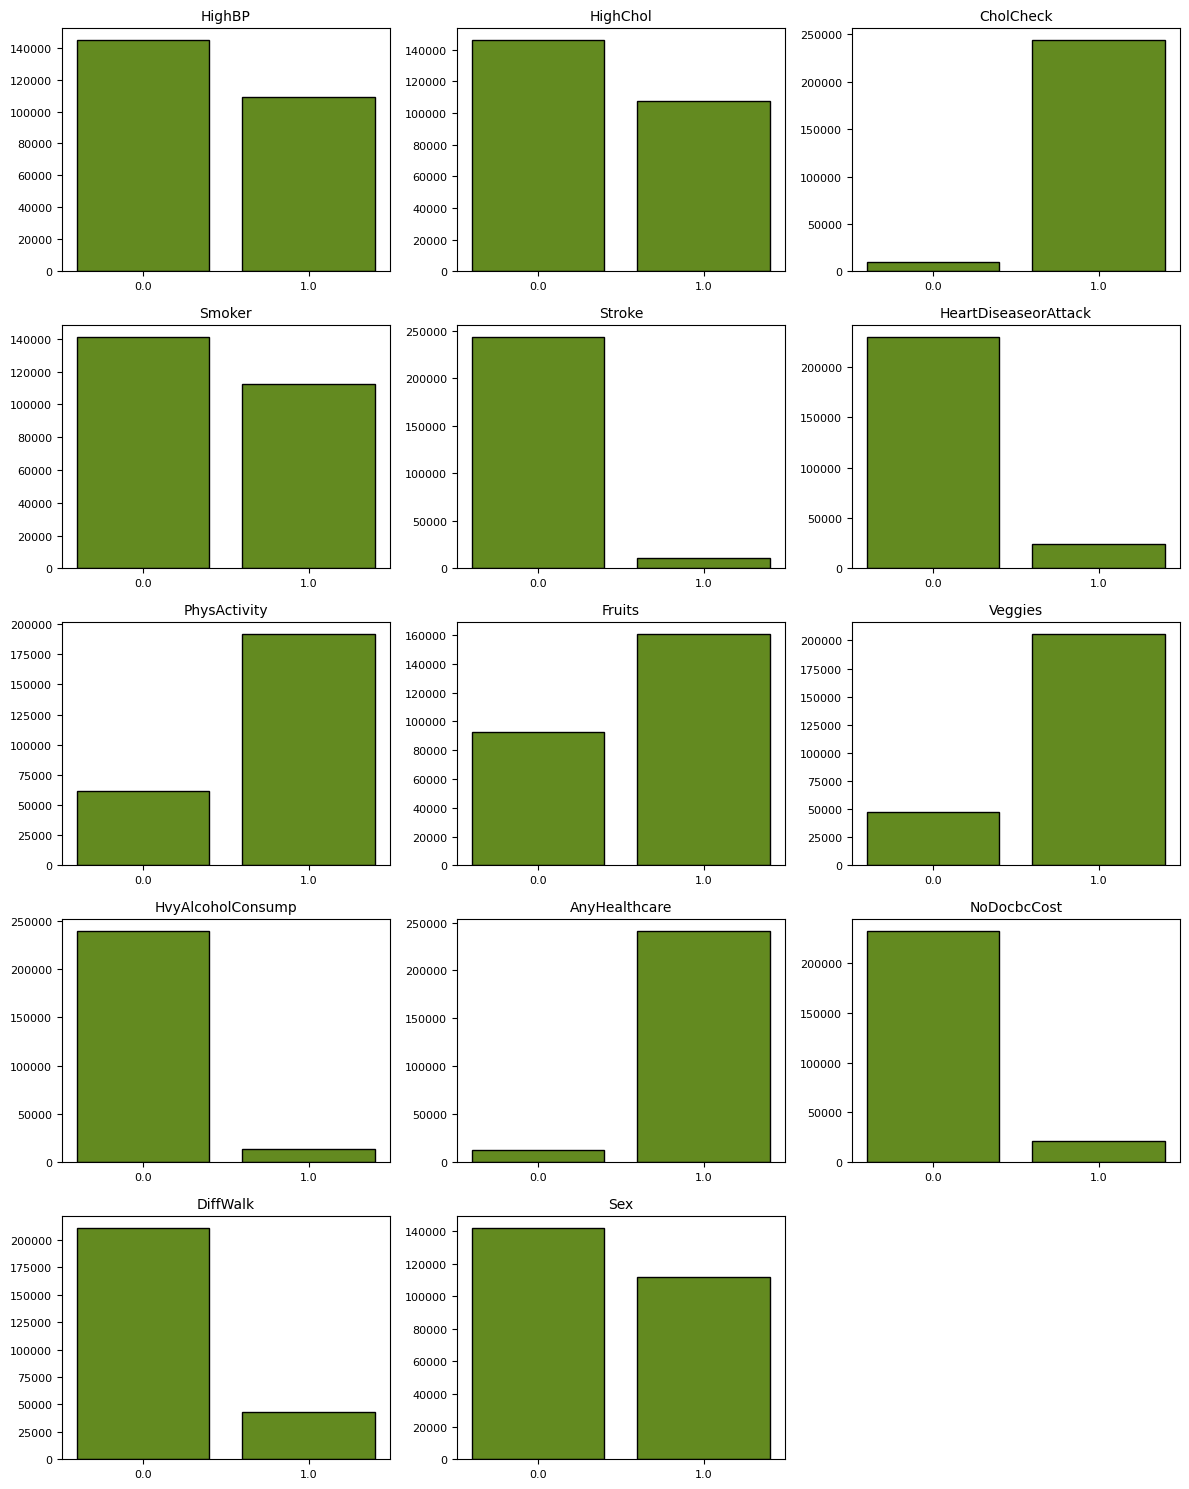

In [47]:
ncols = 3
nrows = -(-len(binary_features) // ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 3))
axes = axes.flatten()

for i, col in enumerate(binary_features):
    counts = raw_data[col].value_counts().sort_index()
    axes[i].bar(counts.index.astype(str), counts.values, color='#638a20', edgecolor='black')
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

for j in range(len(binary_features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Main takeaways:
- BMI, PhysHlth, MentHlth have many upper outliers — may require special handling (e.g. winsorizing, log transform).
- Age, Education, Income are clean and fairly well-distributed.
- The dataset appears to represent a mostly healthy and educated population, with some subgroups experiencing significant health issues.

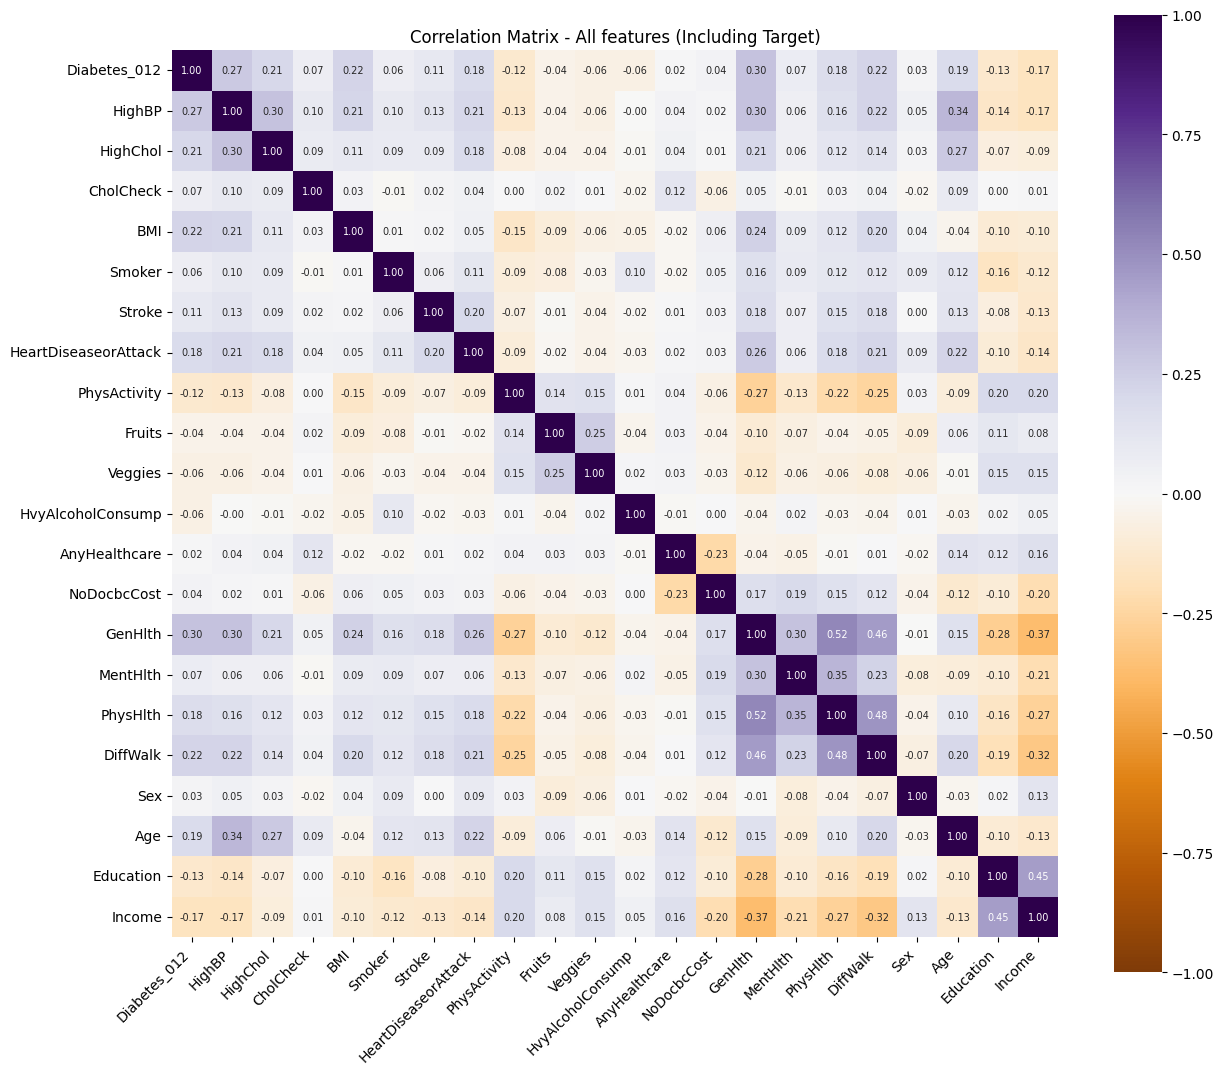

In [50]:
corr_all = raw_data.corr()

plt.figure(figsize=(13, 11))
sns.heatmap(corr_all, annot=True, fmt=".2f", cmap='PuOr', vmin=-1, vmax=1, square=True,
            xticklabels=corr_all.columns, yticklabels=corr_all.columns, annot_kws={"size": 7})
plt.title('Correlation Matrix - All features (Including Target)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Main takeaways:
- Top positive predictors for diabetes: GenHlth, HighBP, BMI, DiffWalk.
- Protective factors: Physical activity, higher income, and education.
- Some variables may have non-linear effects or interact (e.g. age × BMI).